<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
# Read in the dataset
import pandas as pd

yelp = pd.read_json('./review_sample.json', lines=True)

In [2]:
# have a quick look at the dataset 
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
import spacy
import re

nlp = spacy.load('en_core_web_lg')

stop_words = nlp.Defaults.stop_words.union(['food', 'place', 'restaurant', ' ', 'd', 'm', 'n', 's', 't', 've'])

def tokenize(doc):
        """
            tokenize will check for stop words, punctuation, and Pronouns
            it will also lemmatize to reduce dimensionality
        """
        lemmas = []
        
        doc = re.sub('[^a-zA-Z 0-9]', ' ', doc)
        doc = nlp(doc)
        
        for token in doc:
            conditions = (token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON') and (token.text not in stop_words)
            if conditions:
                lemmas.append(token.lemma_)

        return lemmas

In [4]:
yelp['tokens'] = yelp['text'].apply(tokenize)

In [5]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, , fake, fake, fake, , small, bu..."
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, Togo, Service, quick, Staff, fri..."
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[Vegas, dozen, time, step, foot, Circus, Circu..."
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, party, , good, a..."
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[3, 5, 4, star, bad, price, , 12, 99, lunch,..."


In [6]:
# have a closer look at our tokens 
yelp[['text', 'stars', 'tokens']]

,text,stars,tokens
0,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",1,"[beware, , fake, fake, fake, , small, bu..."
1,Came here for lunch Togo. Service was quick. S...,4,"[come, lunch, Togo, Service, quick, Staff, fri..."
2,I've been to Vegas dozens of times and had nev...,3,"[Vegas, dozen, time, step, foot, Circus, Circu..."
3,We went here on a night where they closed off ...,1,"[go, night, close, street, party, , good, a..."
4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",4,"[3, 5, 4, star, bad, price, , 12, 99, lunch,..."
...,...,...,...
9995,My family and I were hungry and this Subway is...,1,"[family, hungry, Subway, open, 24, hour, guy, ..."
9996,My wife and I came here with a a couple of fri...,3,"[wife, come, couple, friend, sever, excited, p..."
9997,The food was just OK and not anything to brag ...,2,"[ok, brag, hot, item, tasty, horrible, look, d..."
9998,Today's visit is great!! Love and enjoy Town S...,4,"[today, visit, great, , love, enjoy, Town, S..."


## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

1. Import
2. Instanitate
3. Fit
4. Transform

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:

tfidf = TfidfVectorizer(stop_words=stop_words,  
                        ngram_range=(1,2),
                        max_features = 8000,
                        tokenizer=tokenize)

In [9]:

tfidf.fit(yelp['text'])

/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=8000,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True,
                stop_words={' ', "'d", "'ll", "'m", "'re", "'s", "'ve", 'a',
                            'about', 'above', 'across', 'after', 'afterwards',
                            'again', 'against', 'all', 'almost', 'alone',
                            'along', 'already', 'also', 'although', 'always',
                            'am', 'among', 'amongst', 'amount', 'an', 'and',
                            'another', ...},
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenize at 0x7faa7cae00d0>, use_idf=True,
                vocabulary=None)

In [10]:
dtm = tfidf.transform(yelp['text'])

In [11]:
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [12]:
dtm.head()

,,,,,,,,,,,...,yummy,yummy,yummy,yup,z,zero,zero star,zone,zoo,zucchini
0,0.120402,0.084988,0.063239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.060050,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.068706,0.096995,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.169543,0.047870,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=10, algorithm='kd_tree')

knn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [14]:
fake_review = ['''
                This place is awesome! I would bring my whole family. music, fun and great food!
                ''']

In [15]:
new = tfidf.transform(fake_review)

In [16]:
knn.kneighbors(new.todense())

(array([[1.        , 1.        , 1.16261826, 1.16382436, 1.16640699,
         1.17747614, 1.1775996 , 1.18177006, 1.21499637, 1.21529348]]),
 array([[6311, 6204, 9287,  426, 1714, 9297, 4068, 3884, 5634, 7594]]))

In [17]:
# similar review #1
yelp.iloc[6311]['text']

'天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來'

In [18]:
# similar review #2
yelp.iloc[6204]['text']

'旅行でラスベガスに来ましたがネイルがはげてるのが気になり、探したお店でした。\n質問にも丁寧に答えてくれましたし、日本人の方も日本語が話せる方も居て、とても綺麗で居心地のいいお店でした。 \nネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました。\n予定になかったまつ毛エクステもお願いし、日本ではまだあまりないブラウンカラーのエクステをしてもらい、とても気に入りました。\nまた是非マッサージなどで伺いたいと思います。'

In [19]:
# similar review #3
yelp.iloc[426]['text']

'I love the music here and the Kpop videos are awesome! The food here is awesome and the waiter has great personality.'

In [20]:
# similar review #4
yelp.iloc[335]['text']

"Love love love. The limeade was awesome. The steak tacos were awesome. The chicken fajita tacos were awesome. Awesome awesome awesome! Can't wait to hit the chandler food truck Friday again!"

In [21]:
# similar review #5
yelp.iloc[9630]['text']

'I went here with a group of guys for my friends bachelor party.  We got bottle service and had a great time.  The service was awesome, someone was alway around willing to help. \n\nThe only thing that was so-so was the music, it seemed inconsistent.  The music seemed to really take off around 3-4 AM.'

In [22]:
# similar review #6
yelp.iloc[9297]['text']

'Whimsical, fun and gorgeous. A very nice walkthrough - and the butterflies in the greenhouse were a fun touch.'

In [23]:
# similar review #7
yelp.iloc[6238]['text']

'Best pizza in Ahwatukee! Family owned. Great service.'

In [24]:
# similar review #8
yelp.iloc[6380]['text']

'YUM!!! I found this place when after returning something at Banana Republic. I was sick of going to the the same old places during my lunch break. I ordered the full sized bowl with terakyi chicken and veggies. It was very good. The sauce wss awesome. The prices are ok because for me, this one bowl lasts me 2 meals. The atmosphere just makes me happy. I went in on a rainy day and they were just playing this fun island music. Brought me to a little tropical island on my lunch break. The service is AMAZING. Someone kept walking around and making sure everyone was doing alright. I will be back!'

In [25]:
# similar review #9
yelp.iloc[4956]['text']

"The best Italian in Las Vegas. I always have Pina's braciola. Home made recipe from Sicily. You can't go wrong with this restaurant. We always bring family, friends and business clients !"

In [26]:
# similar review #10
yelp.iloc[5634]['text']

"This place looks AMAZING. The art on the walls is bright and just makes you feel happy. Bring your appetite!!! Then order the fried pickles!!! They're amazing! The music is relaxed and the atmosphere rocks. \n\nThis restaurant is different from the rest. Check em out! You really can't beat good food, a happy atmosphere, awesome decor, and did I say: DELICIOUS food?!?  \n\nI'll be back soon!! This place is very family friendly so bring all of the kids! There's a lot of seating so bring a big group of friends."

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

clf = RandomForestClassifier()

pipe = Pipeline([('tfidf', tfidf), ('clf', clf)])

In [28]:
yelp['stars'].dtype

dtype('int64')

<AxesSubplot:>

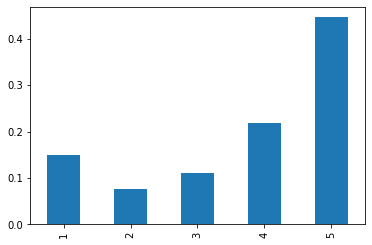

In [29]:
yelp['stars'].value_counts(normalize=True).sort_index().plot(kind='bar')

<AxesSubplot:xlabel='stars', ylabel='count'>

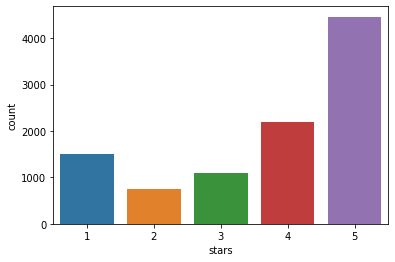

In [30]:
# make it look nicer
import seaborn as sns

sns.countplot(yelp['stars'])

In [35]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'tfidf__max_features' : (500, 1000) 
}

grid_search = GridSearchCV(pipe, parameters , cv=2, n_jobs=-1, verbose=1)

grid_search.fit(yelp['text'], yelp['stars'])

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/home/jepoy/miniconda3/envs/ds-unit-4/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: 

In [ ]:
print(grid_search.predict(fake_review))

# I will reattempt this sprint challenge and make sure that it runs.

## I setup the GridSearch and it took  more that 25 mins and still going.

## So i set up the code that would follow.

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [ ]:
import gensim
from gensim import corpora
from gensim.models import LdaMulticore
from.models.ldamulticore import LdaMulticore
from gensim.corpora import Dictionary


Learn the vocubalary of the yelp data:

In [ ]:
id2word = corpora.Dictionary(yelp['tokens'])

Create a bag of words representation of the entire corpus

In [ ]:
corpus = [id2word.doc2bow(doc) for doc in yelp['tokens']]

Your LDA model should be ready for estimation: 

In [ ]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=6,
                   num_topics = 10 # You can change this parameter
                  )

I setup the GridSearch and it took  more that 25 mins and still going.

So i set up the code that would follow.

Create 1-2 visualizations of the results

In [ ]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [ ]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Create more visualizations of the LDA results and provide written analysis
* Incorporate RandomizedSearchCV into docoument classification pipeline
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)

In [ ]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, passes=3, id2word=id2word, workers=12)
            coherencemodel = CoherenceModel(model=model, dictionary=dictionary, corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_,
                                    'num_topics': num_topics,
                                    'coherence_score':coherencemodel.get_coherence()})

    return coherence_values

In [ ]:

coherence_values = compute_coherence_values(dictionary=id2word, 
                                            corpus=corpus,  
                                            start=5, 
                                            limit=50, 
                                            step=15,
                                            passes=5)

In [ ]:
import seaborn as sns

topic_coherence = pd.DataFrame.from_records(coherence_values)

topic_coherence.head(10)

In [ ]:
import seaborn as sns

ax = sns.lineplot(x='num_topics', y='coherence_score', data=topic_coherence)


Although this is not necessarily an LDA "result," coherence modeling is quite useful (when your model is good) in determining how many topics to include in your LDA topic model. Here, the highest value is the lowest number, which started at 5. At this point, it would probably be worth it to run the coherence model again with an even smaller number for the start of the iteration.

In [ ]:

def sentimentalize(stars):
    if stars == 3:
        return "neutral"
    elif stars > 3:
        return "positive"
    else: 
        return "negative"
    
yelp['sentiment'] = yelp['stars'].apply(sentimentalize)

yelp.head()

In [ ]:

doc_topics = [lda[doc] for doc in corpus]

In [ ]:
def update(doc):
        d_dist = {k:0 for k in range(0,5)}
        for t in doc:
            d_dist[t[0]] = t[1]
        return d_dist
    
new_distro = [update(d) for d in doc_topics]

In [ ]:
dft = pd.DataFrame.from_records(new_distro)
dft.columns = topics

In [ ]:
yelp['primary_topic'] = dft.idxmax(axis=1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="primary_topic", hue="sentiment", data=yelp)
plt.xticks(rotation=90)

I created a sentiment analysis of the LSA results to show how the sentiments range between the different top 5 topics. As expected, since my model's parameters were not hyptertuned well, the distribution of sentiment aligns closely with the general distribution of ratings; that is to say, since most of the ratings were positive to begin with, and neutral ratings of 3 were the least frequent, the sentiment between the models showed the same distribution. I think yelp reviews are particularly difficult to find good topics for, since the range of descriptors are so few that the same words repeat. It would be beneficial in the future to lower the max_df parameter of the vectorizer so that it doesn't pull words that show up in the vast majority of the reviews. This would increase the salience of specific words.